# **Image Thresholding**

Görselde bulunan piksel değerleri 0-255 arasındadır.

Örneğin threshold değeri 125 olarak belirlenirse ve bu threshold değerinin üstünde değerler gösterilmeyip altındaki değerler gösterilirse ortaya orijinal görselin ana hatları ortaya çıkar.

Böylelikle görselde bulunan gereksiz detaylar ortadan kaldırılıp ana hatlar vurgulanır.

Adaptive thresholding yöntemiyle de görselde bulunan gereksiz detaylar ortadan kaldırılıp ana hatlar ortaya çıkartılır.

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
#read image
img = cv2.imread(r"C:\Users\ilhan\Desktop\img1.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

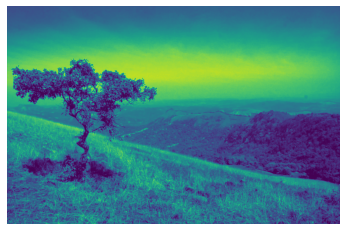

In [ ]:
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

Gray scale yapıldığında siyah beyaz bir görsel elde edilmez.

Her bir pikselin sahip olduğu parlaklık değerinin belirlenmesidir.

Beyaza yakın olan renkler sarıyla, siyaha yakın renkler de koyu mavi ile gösterilir.

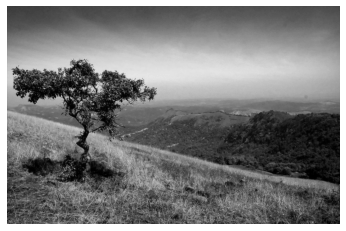

In [ ]:
plt.figure()
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

cmap parametresi ile colormap değiştirildiğinde 0'a yakın değerler siyah, 255'e yakın değerler beyaz olarak olarak görünür.

0'dan 255'e doğru gidildiğinde, siyahtan beyaza doğru renk açılır.

In [ ]:
#thresholding
_, thres_img = cv2.threshold(img, thresh = 60, maxval = 255, type = cv2.THRESH_BINARY)

Seçilen threshold değerinin üzerindeki pikseller görülmek istenmemektedir.

Bu yüzden type olarak THRESH_BINARY kullanılır.

Piksel değerleri 0-255 arasında değiştiği için alabileceği maximum değer 255'tir.

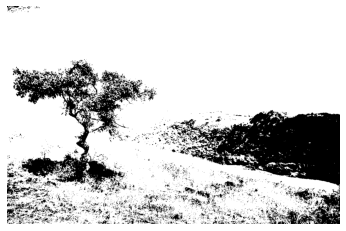

In [ ]:
plt.figure()
plt.imshow(thres_img, cmap="gray")
plt.axis("off")
plt.show()

Threshold değeri 60 seçildiğinde ağaç ön plandadır.

Arkaplana 255 değeri atanarak beyaz olmuştur.

In [ ]:
#thresholding
_, thres_img = cv2.threshold(img, thresh = 60, maxval = 255, type = cv2.THRESH_BINARY_INV)

type olarak THRESH_BINARY_INV seçildiğinde 60-255 arasındaki piksel değerleri siyah yapılır.

60'ın altındaki piksel değerleri beyaz yapılacaktır.

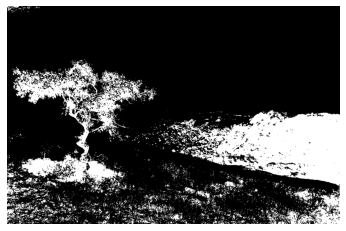

In [ ]:
plt.figure()
plt.imshow(thres_img, cmap="gray")
plt.axis("off")
plt.show()

Bu yöntemde de arka plan ortadan kaldırılmıştır, ağaç ön plandadır.

Bu yöntemde ön plana çıkarılmak istenen kısım beyaz, detaylar siyah yapılır.

Bu yöntemde dağın bir kısmını alırken bir kısmını almamaktadır. 

Çünkü ağaçların bir kısmı koyu yapraklıdır. 

Dağı bir bütün olarak değerlendirmek için **adaptive thresholding** yöntemi kullanılır.

Bu yöntemde threshold değeri global olarak verilmez.

Bu yöntem görüntünün farklı yerlerinde farklı aydınlatmalar yapıldığında tercih edilir.

Görüntü farklı yerleri için farklı threshold değerleri hesaplanır.

Böylelikle aydınlatması farklı olan bölgelerde avantaj sağlanır.

In [ ]:
#adaptive threshold
thresh_img2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,8) 
                                   #(görsel, max value, yöntem)

ADAPTIVE_THRESH_MEAN_C yönteminde c sabiti göre bir ortalama alınarak threshold değeri belirlenir. 

Burada c sabiti 8'dir.

THRESH_BINARY eşikleme türüdür.

11 block size'dır. Bu görsel için 11 piksel topluluğu seçilmiştir ve her bir topluluk için ayrı bir threshold değeri belirlenecektir.

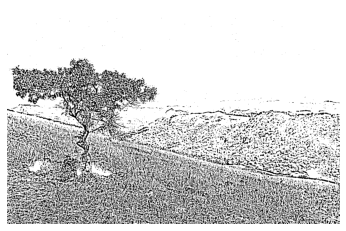

In [ ]:
plt.figure()
plt.imshow(thresh_img2, cmap="gray")
plt.axis("off")
plt.show()

Adaptive threshold ile elde edilen görselde bir bütünlük vardır. 

Ağaç ayırt edilebilir.

Bir önceki adımda dağ ikiye bölünmüştü, burada bir bütün olarak ele alınabilir ve dağın sınırları bellidir.

Ağacın altında bulunan zemin ayırt edilebilir.

Arkada bulunan kısım ile gökyüzü çıkartılmıştır.

Böylelikle normal threshold'dan daha iyi bir threshold yapıldığı gözükmektedir.